# **🔷 Regression Overview**
In this project, regression analysis was used to predict the medical expenses incurred by individuals based on various demographic and lifestyle-related features. Regression is a type of supervised machine learning algorithm that models the relationship between a dependent variable (target) and one or more independent variables (features).

In [1]:
# imoprting the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
# reading the data
df=pd.read_csv("/content/insurance.csv")

In [3]:
# checking the shape of the data
df.shape

(1338, 7)

In [4]:
# first 5 rows from the data
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
# columns of the data
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

### **Stastical analysis**

In [6]:
# stastical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [7]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


--> From the above data we can see that the all the data types are in the proper manner
--> We can see that the there is `no null` values in this

In [8]:
# checking null values
df.isnull().sum().sum()  # no null valuse in the data

np.int64(0)

In [9]:
# checking for the duplicates
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


--> We can see that the there is one duplicate in the data which is the `581 row` from the given data  
--> Removing the duplicate from the data

In [10]:
duplicate=df.duplicated().sum()
print("\033[36m"f"The duplicates in the data is :{duplicate}"+"\033[4m")

The duplicates in the data is :1


In [11]:
# deleting the duplicate from the data
df.drop_duplicates(inplace=True)

In [12]:
duplicate=df.duplicated().sum()
print("\033[36m"f"The duplicates in the data is :{duplicate}"+"\033[4m")

The duplicates in the data is :0


In [13]:
# reseting the index
df.reset_index(drop=True,inplace=True)

In [14]:
#shape of the data
df.shape

(1337, 7)

## **EDA**

In [15]:
region_wise = df.groupby("region")["expenses"].sum().sort_values(ascending=False)
print("\033[31m"+"Total expenses by regions:-",df['expenses'].sum(),"\n")
print("\033[32m"+f"{region_wise}"+"\033[5m")

Total expenses by regions:- 17754185.63 

region
southeast    5363689.80
northeast    4343668.64
northwest    4034072.37
southwest    4012754.82
Name: expenses, dtype: float64


--> From the above we can see that the the total expences of the give data is the `17754185`  
--> The highest expences in the region is the `southeast 5363689.80`  
--> The lowest expences of the region is the southwest `4012754.82`


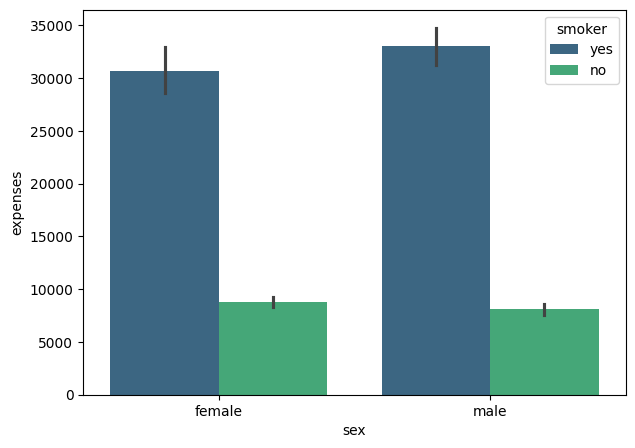

In [16]:
# barplot between the male and the female
plt.figure(figsize=(7,5))
sns.barplot(x='sex',y='expenses',data=df,hue='smoker',palette="viridis")
plt.show()

--> We can see that the from the above males are smoking then the females by this we can say that the there are spending the more money on the segrates

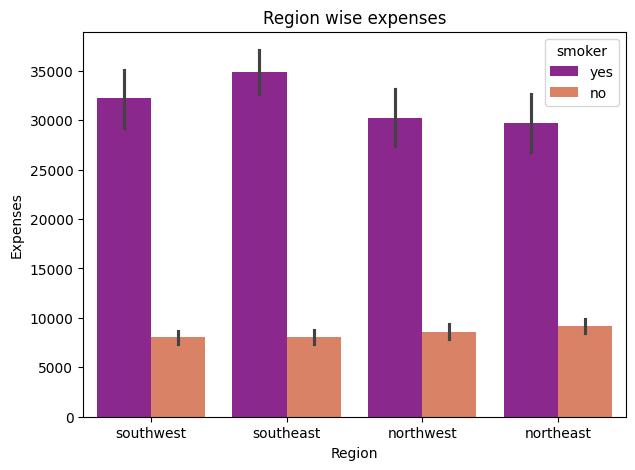

In [17]:
# reagion wise smokers
plt.figure(figsize=(7,5))
sns.barplot(x='region',y='expenses',data=df,hue='smoker',palette="plasma")
plt.title('Region wise expenses')
plt.xlabel('Region')
plt.ylabel('Expenses')
plt.show()


In [18]:
somking=df.value_counts('smoker')
print("\033[3m"+"\033[32m" + "Checking the value count for the smokers" + "\033[36m ")
print(somking)
somking.sum()

Checking the value count for the smokers 
smoker
no     1063
yes     274
Name: count, dtype: int64


np.int64(1337)

--> From the above info we can see that the there are the `274 people ` are smoking including the female  
--> `1063` people are not smoking

In [19]:
smokers_by_region = df[df['smoker'] == 'yes'].groupby('region').size().reset_index(
    name='no_of_smokers').sort_values(by='no_of_smokers', ascending=False)
# Display the result
print("\033[31m"+"Total Purchases by Channel:-",(somking).sum(),"\n")
print("\033[32m"+f"{smokers_by_region}"+"\033[5m")

Total Purchases by Channel:- 1337 

      region  no_of_smokers
2  southeast             91
0  northeast             67
1  northwest             58
3  southwest             58


--> From the above info we can see that the there are the `91 people` from the `southeast` who are smoking  
--> Least from the `southwest` which is the `58`  
--> Other are lik the `northeast 67` and the `northwest 58`

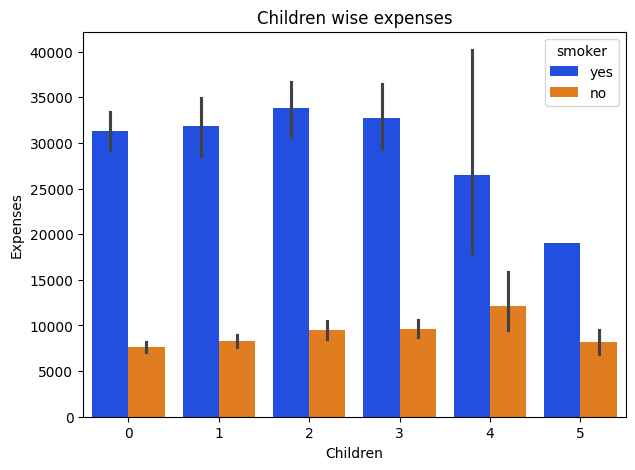

In [20]:
plt.figure(figsize=(7,5))
sns.barplot(x='children',y='expenses',data=df,hue='smoker',palette="bright")
plt.title('Children wise expenses')
plt.xlabel('Children')
plt.ylabel('Expenses')
plt.show()

--> From the above we can see that the people who are with the `2 childrens` ther are `spending the more` compare to the others and in that we can see that the they are smoking too

In [21]:
# valu_count of the childrens
child_count=df.value_counts('children')
print("\033[3m"+"\033[32m" + "Checking the value count for the childerns" + "\033[36m ")
child_count=pd.DataFrame(child_count)
print(child_count)

Checking the value count for the childerns 
          count
children       
0           573
1           324
2           240
3           157
4            25
5            18


--> We can see that the there are the `573 people who are not having the childrens `
--> we can see that the most of the people having the `1 child `which is the `324` and the `240` people with the `2`,and the `157` are having the `3` childrens and `25` are having the `4` childrens  
--> Only the few people are having the `5` childrens like the `18` people

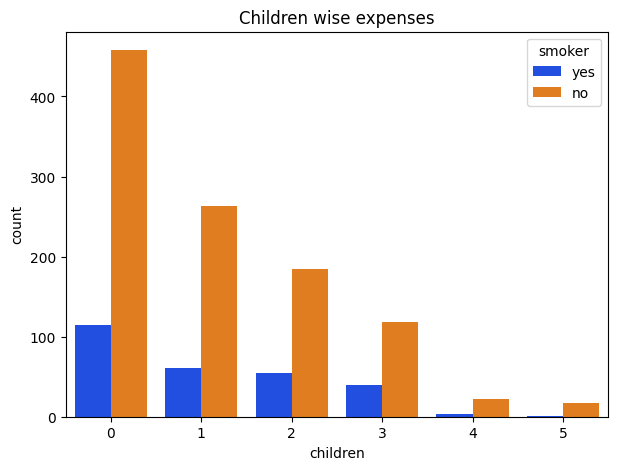

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(x='children',data=df,hue='smoker',palette="bright")
plt.title('Children wise expenses')
plt.show()

--> From the above plot we can see that the people who are not having any childrens they are only smoking more comare to the other people

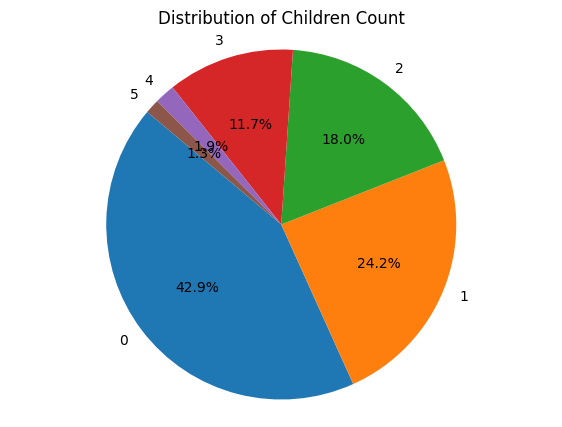

In [23]:
# piechart
plt.figure(figsize=(7,5))
child_counts = df['children'].value_counts()
plt.pie(child_counts, labels=child_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Children Count')
plt.axis('equal')
plt.show()

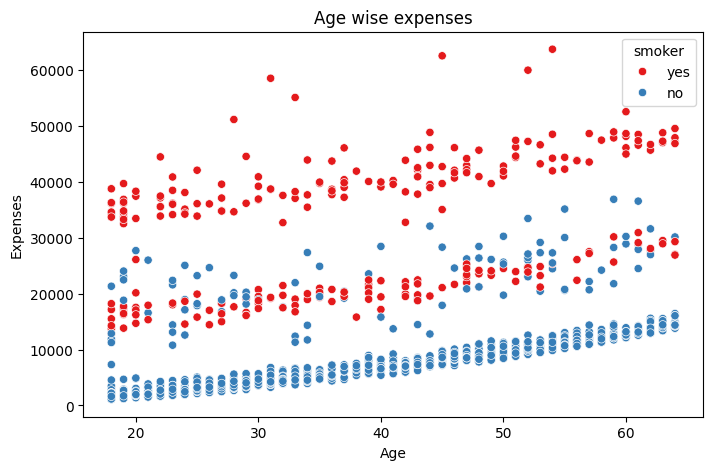

In [24]:
# scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x="age",y="expenses",data=df,hue="smoker",palette="Set1")
plt.title('Age wise expenses')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.show()

In [25]:
numeric_cols = ['age', 'bmi', 'children', 'expenses']

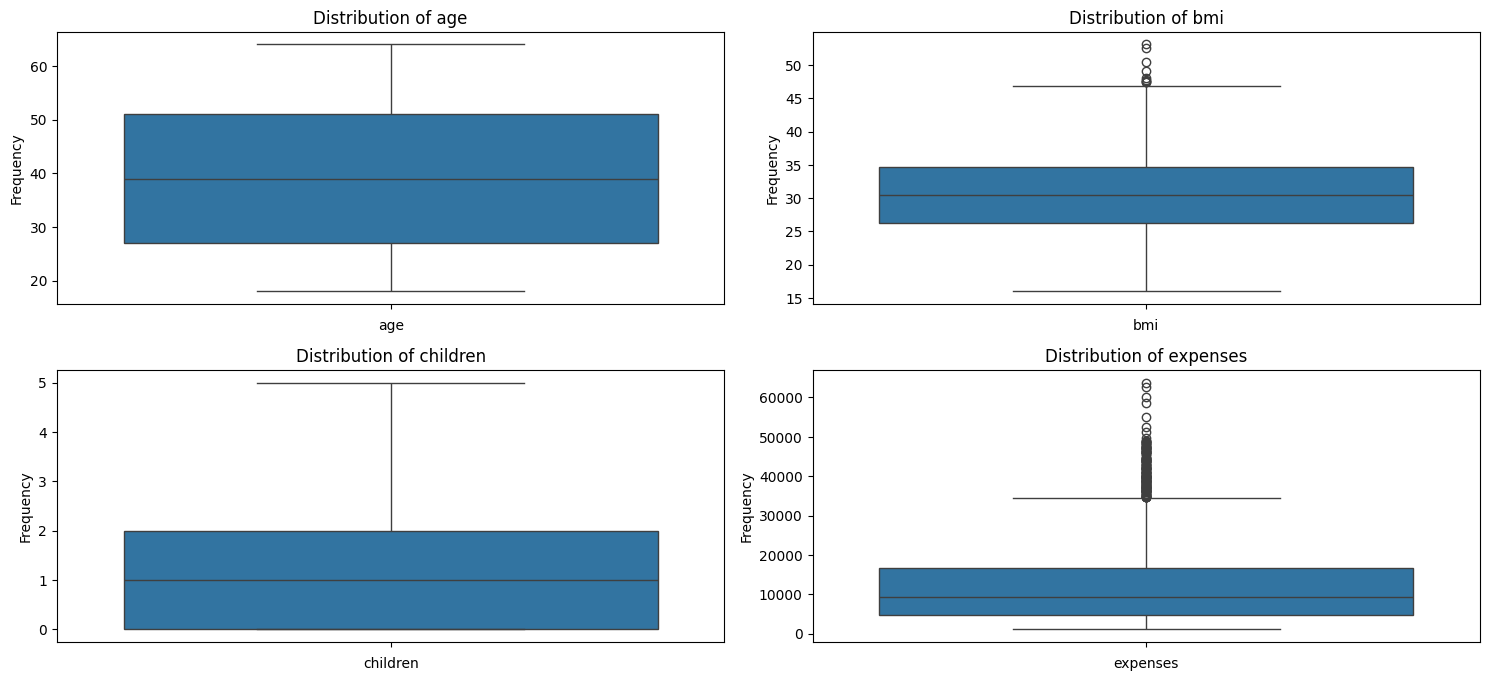

In [26]:

plt.figure(figsize=(15,10))  # Define figure once

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)  # Adjusted to fit  subplots
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Prevent overlap
plt.show()

**Treating the outliersa**

In [27]:
for col in numeric_cols:
 Q1 = df[col].quantile(0.25)
 Q3 = df[col].quantile(0.75)
 IQR = Q3 - Q1
 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR
 df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

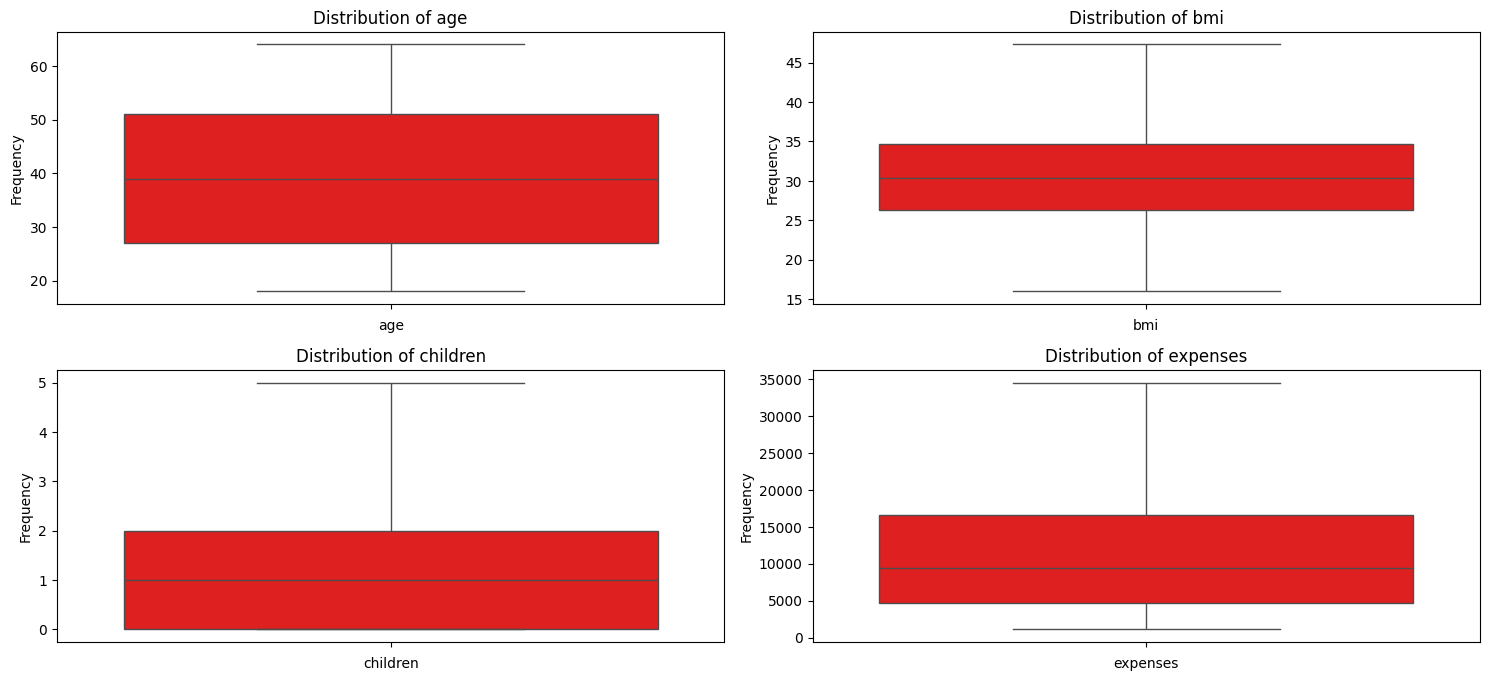

In [28]:
plt.figure(figsize=(15,10))  # Define figure once

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)  # Adjusted to fit  subplots
    sns.boxplot(df[col],color="red")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Prevent overlap
plt.show()

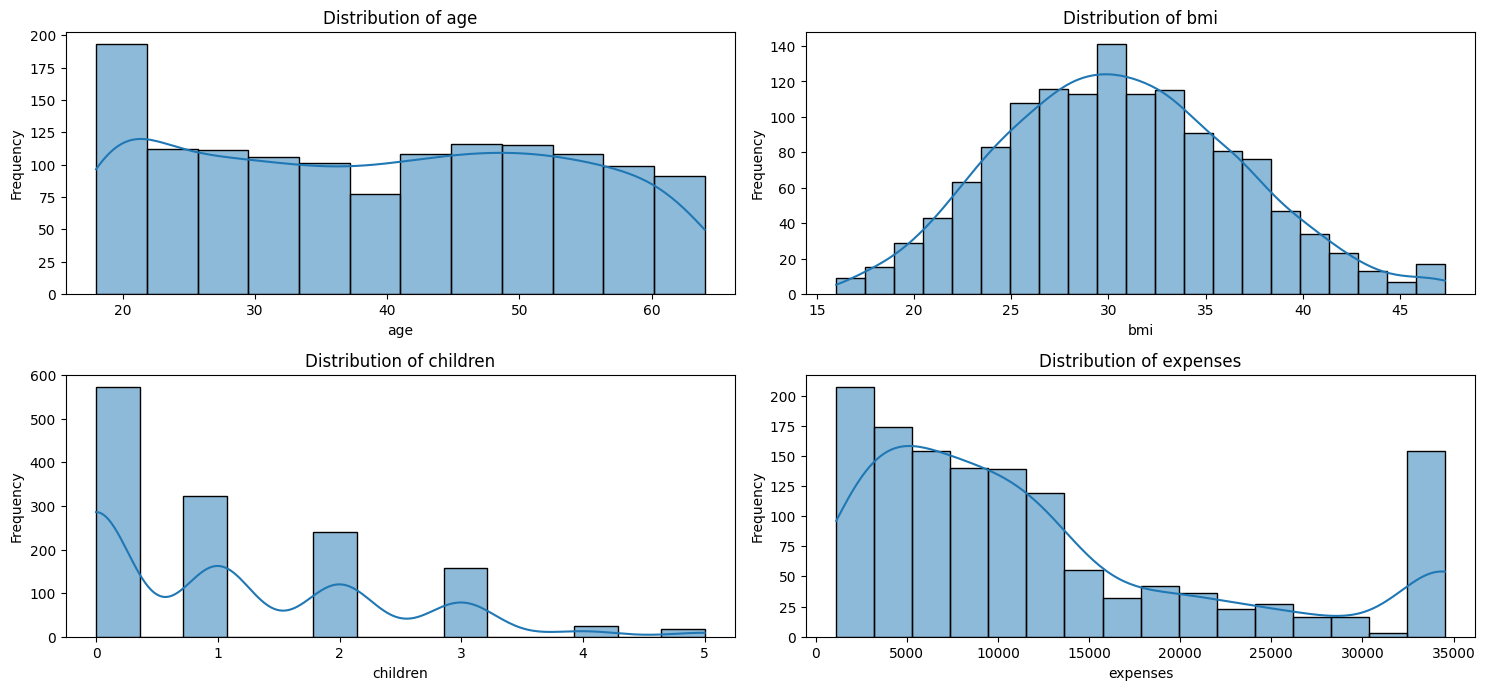

In [29]:
plt.figure(figsize=(15,10))  # Define figure once

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)  # Adjusted to fit  subplots
    sns.histplot(df[col],kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Prevent overlap
plt.show()

--> From the above we can see that the Age is normally distributed

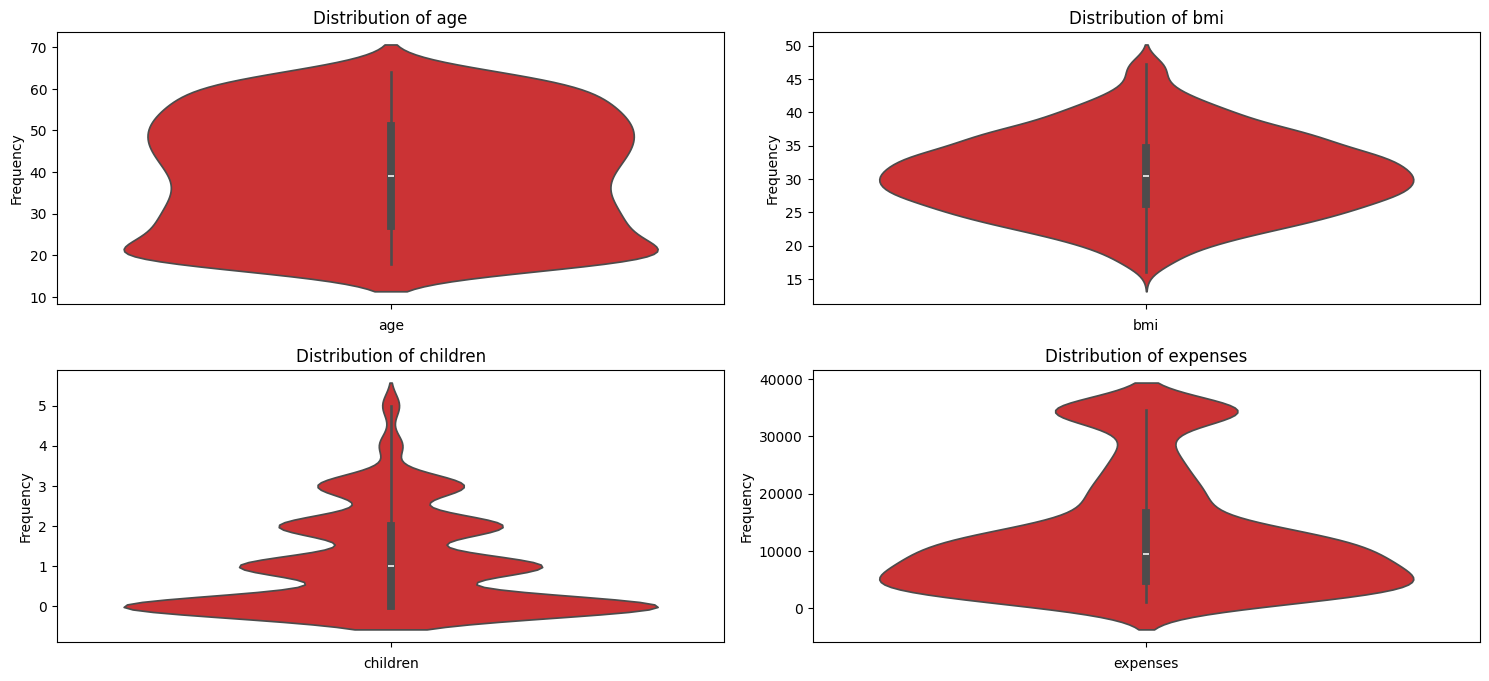

In [30]:
plt.figure(figsize=(15,10))  # Define figure once

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)  # Adjusted to fit  subplots
    sns.violinplot(df[col],palette="Set1")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Prevent overlap
plt.show()

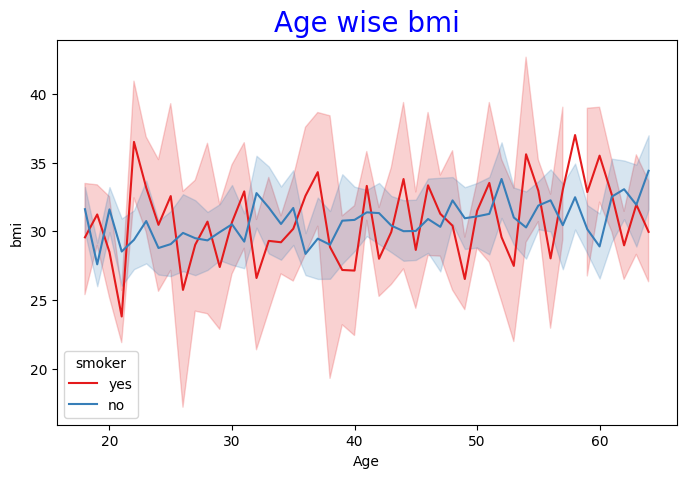

In [31]:
# line plot
plt.figure(figsize=(8,5))
sns.lineplot(x="age",y="bmi",data=df,hue="smoker",palette="Set1")
plt.title('Age wise bmi',color="Blue", fontsize=20)
plt.xlabel('Age')
plt.ylabel('bmi')
plt.show()

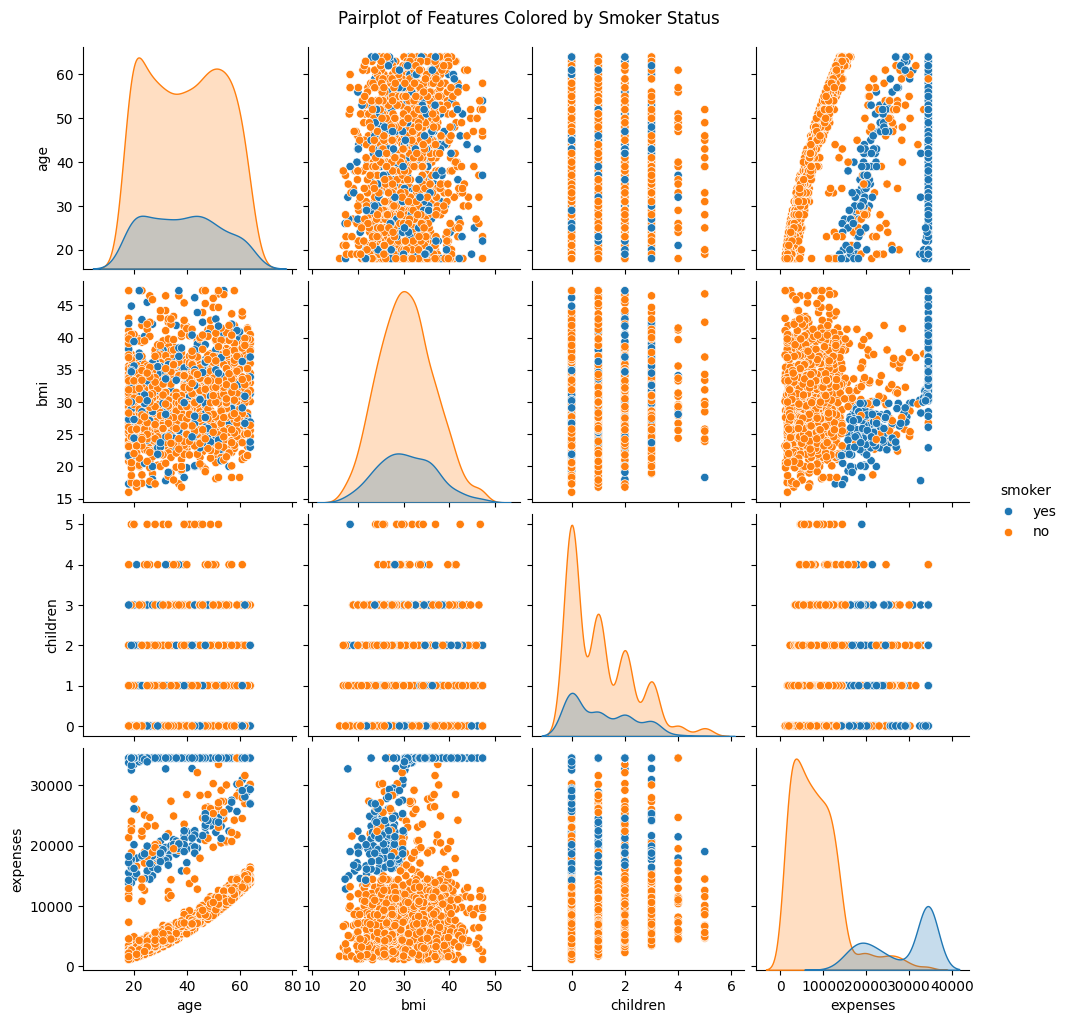

In [32]:
sns.pairplot(df, hue='smoker', diag_kind='kde', vars=['age', 'bmi', 'children', 'expenses'])
plt.suptitle("Pairplot of Features Colored by Smoker Status", y=1.02)
plt.show()

In [33]:
corr=df[['age','bmi','children','expenses']].corr()
print("\033[32m"+f"{corr}"+"\033[5m")

               age       bmi  children  expenses
age       1.000000  0.112074  0.041536  0.312423
bmi       0.112074  1.000000  0.013578  0.161398
children  0.041536  0.013578  1.000000  0.072372
expenses  0.312423  0.161398  0.072372  1.000000


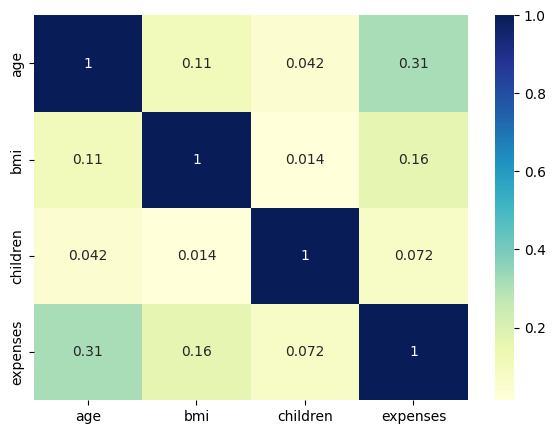

In [34]:
plt.figure(figsize=(7,5))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

--> from the above we cant see the high correleation all are in the normally coreleated

## **REGRESSION**

In [35]:
# importing the needed libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [36]:
from sklearn.preprocessing import LabelEncoder

# Create encoder instance
le = LabelEncoder()

# Apply to each column
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

display(df)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1332,50,1,31.0,3,0,1,10600.55
1333,18,0,31.9,0,0,0,2205.98
1334,18,0,36.9,0,0,2,1629.83
1335,21,0,25.8,0,0,3,2007.95


#**SIMPLE LINEAR REGRESSION**

In [37]:
# Define independent variables (X) and target variable (y)
X = df[['smoker']]
y = df['expenses']

In [38]:
# splitting the data training and the testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)
y_pred

array([ 8492.5414152 ,  8492.5414152 ,  8492.5414152 , 27757.06542056,
        8492.5414152 ,  8492.5414152 , 27757.06542056,  8492.5414152 ,
        8492.5414152 ,  8492.5414152 ,  8492.5414152 , 27757.06542056,
       27757.06542056,  8492.5414152 ,  8492.5414152 ,  8492.5414152 ,
        8492.5414152 , 27757.06542056,  8492.5414152 ,  8492.5414152 ,
        8492.5414152 , 27757.06542056,  8492.5414152 , 27757.06542056,
       27757.06542056,  8492.5414152 , 27757.06542056, 27757.06542056,
        8492.5414152 ,  8492.5414152 ,  8492.5414152 ,  8492.5414152 ,
        8492.5414152 ,  8492.5414152 , 27757.06542056,  8492.5414152 ,
        8492.5414152 ,  8492.5414152 , 27757.06542056,  8492.5414152 ,
        8492.5414152 , 27757.06542056, 27757.06542056,  8492.5414152 ,
        8492.5414152 ,  8492.5414152 ,  8492.5414152 ,  8492.5414152 ,
        8492.5414152 ,  8492.5414152 ,  8492.5414152 ,  8492.5414152 ,
       27757.06542056,  8492.5414152 ,  8492.5414152 ,  8492.5414152 ,
      

In [41]:
r2 = r2_score(y_test, y_pred)
r2

0.6900184505295892

In [42]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_val': model.predict(X)})

In [43]:
y_pred_df

,actual,predicted_val
0,16884.92,27757.065421
1,1725.55,8492.541415
2,4449.46,8492.541415
3,21984.47,8492.541415
4,3866.86,8492.541415
...,...,...
1332,10600.55,8492.541415
1333,2205.98,8492.541415
1334,1629.83,8492.541415
1335,2007.95,8492.541415


--> in the simple regression we have take the target as the expences and the featur variable as the smoker   
--> Then from the above we can observed that the there are the some predection based on the trained data set   
--> The predected values are converted it into the data frame

## **MLR**

In [44]:
df1=df.copy()

In [45]:
df1

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1332,50,1,31.0,3,0,1,10600.55
1333,18,0,31.9,0,0,0,2205.98
1334,18,0,36.9,0,0,2,1629.83
1335,21,0,25.8,0,0,3,2007.95


In [46]:
# Define independent variables (X) and target variable (y)
x=df1.drop('expenses',axis=1)
y=df1['expenses']

In [47]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [49]:
#predecting the data
y_pred=mlr.predict(X_test)
y_pred

array([ 8492.5414152 ,  8492.5414152 ,  8492.5414152 , 27757.06542056,
        8492.5414152 ,  8492.5414152 , 27757.06542056,  8492.5414152 ,
        8492.5414152 ,  8492.5414152 ,  8492.5414152 , 27757.06542056,
       27757.06542056,  8492.5414152 ,  8492.5414152 ,  8492.5414152 ,
        8492.5414152 , 27757.06542056,  8492.5414152 ,  8492.5414152 ,
        8492.5414152 , 27757.06542056,  8492.5414152 , 27757.06542056,
       27757.06542056,  8492.5414152 , 27757.06542056, 27757.06542056,
        8492.5414152 ,  8492.5414152 ,  8492.5414152 ,  8492.5414152 ,
        8492.5414152 ,  8492.5414152 , 27757.06542056,  8492.5414152 ,
        8492.5414152 ,  8492.5414152 , 27757.06542056,  8492.5414152 ,
        8492.5414152 , 27757.06542056, 27757.06542056,  8492.5414152 ,
        8492.5414152 ,  8492.5414152 ,  8492.5414152 ,  8492.5414152 ,
        8492.5414152 ,  8492.5414152 ,  8492.5414152 ,  8492.5414152 ,
       27757.06542056,  8492.5414152 ,  8492.5414152 ,  8492.5414152 ,
      

In [50]:
#converting it into the data frame
y_pred_df=pd.DataFrame({'actual':y_test,'predicted_val':mlr.predict(X_test)})
y_pred_df

,actual,predicted_val
899,8688.86,8492.541415
1063,5708.87,8492.541415
1255,11436.74,8492.541415
298,34524.79,27757.065421
237,4463.21,8492.541415
...,...,...
534,13831.12,8492.541415
542,13887.20,8492.541415
759,3925.76,8492.541415
1283,34524.79,27757.065421


In [51]:
r2 = r2_score(y_test, y_pred)
r2

0.6900184505295892

# **Lasso**

In [52]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV

In [53]:
lasso_params = {"alpha": [0.01, 0.1, 1, 10, 50, 100]}
lasso = GridSearchCV(Lasso(), lasso_params, cv=5)

In [54]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [55]:
y_pred_lasso = lasso.predict(X_test)

In [56]:
r2_score(y_test,y_pred_lasso)

0.6900138887553513

In [57]:
params=dict(alpha=range(1,100))

In [58]:
grid_search=GridSearchCV(lasso,params)

In [59]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=Lasso(alpha=0.1), param_grid={'alpha': range(1, 100)})

In [60]:
grid_search.best_params_

{'alpha': 18}

In [61]:
lasso = Lasso(alpha=18)
lasso.fit(X_train, y_train)

Lasso(alpha=18)

In [62]:
y_pred_lasso_1 = lasso.predict(X_test)

In [63]:
r2_score(y_test,y_pred_lasso_1)

0.6891785820846641

# **Ridge**

In [64]:
from sklearn.linear_model import Ridge

ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 50, 100],
    'solver': ['sag', 'lsqr', 'saga']  # use solvers that avoid sym_pos issue
}

In [65]:
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')

In [66]:
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 50, 100],
                         'solver': ['sag', 'lsqr', 'saga']},
             scoring='r2')

In [67]:
y_pred_ridge = ridge_grid.predict(X_test)
print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Ridge Regression R² Score:", r2_score(y_test, y_pred_ridge))

Best parameters for Ridge: {'alpha': 1, 'solver': 'sag'}
Ridge Regression R² Score: 0.6891720413683924


# **ElasticNet**

In [68]:
elastic_params = {
    "alpha": [0.01, 0.1, 1, 10],
    "l1_ratio": [0.1, 0.5, 0.7, 0.9]
}

In [69]:
elastic = GridSearchCV(ElasticNet(), elastic_params, cv=5)

In [70]:
elastic.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9]})

In [71]:
y_pred_elastic = elastic.predict(X_test)

In [72]:
print("ElasticNet Best Params:", elastic.best_params_)
print("ElasticNet R²:", r2_score(y_test, y_pred_elastic))

ElasticNet Best Params: {'alpha': 0.01, 'l1_ratio': 0.9}
ElasticNet R²: 0.6891234559247891


# **Creating Pipeline**

In [73]:
from sklearn.pipeline import Pipeline

In [74]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1332,50,1,31.0,3,0,1,10600.55
1333,18,0,31.9,0,0,0,2205.98
1334,18,0,36.9,0,0,2,1629.83
1335,21,0,25.8,0,0,3,2007.95


In [75]:
df1 = df.copy()

In [76]:
df1

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1332,50,1,31.0,3,0,1,10600.55
1333,18,0,31.9,0,0,0,2205.98
1334,18,0,36.9,0,0,2,1629.83
1335,21,0,25.8,0,0,3,2007.95


In [77]:
X = df1.drop('expenses', axis=1)
y = df1['expenses']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train.shape, X_test.shape

((1069, 6), (268, 6))

In [80]:
pipeline = Pipeline([('model', LinearRegression())])

In [81]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', LinearRegression())])

In [82]:
## Accuracy score
pipeline.score(X_test, y_test)

0.8206757483101594

# **Deployment**

In [87]:
import pickle
with open("Expenses_Predictor.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Model saved as Expenses_Predictor.pkl")

Model saved as Expenses_Predictor.pkl
